In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pwd

/content


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora

/content/drive/MyDrive/Colab Notebooks/DSCT/NLP/Quora


In [3]:
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.metrics import accuracy_score

In [4]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/QPS/QPS 60000.xlsx")

In [5]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   question1     60000 non-null  object 
 1   question2     60000 non-null  object 
 2   is_duplicate  60000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [7]:
df['is_duplicate'].value_counts()

0.0    37600
1.0    22400
Name: is_duplicate, dtype: int64

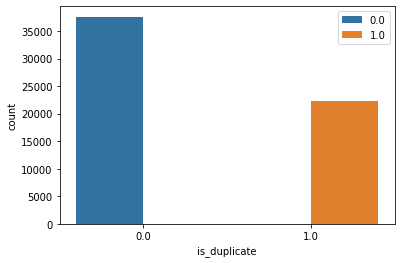

In [8]:
sns.countplot(x="is_duplicate",hue="is_duplicate",data=df)
plt.legend(bbox_to_anchor=(1,1))

In [9]:
df.columns

Index(['question1', 'question2', 'is_duplicate'], dtype='object')

In [10]:
#Model_Evaluation FUN

from sklearn.metrics import  precision_score,accuracy_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
def model_Eval(y_test,y_Pred):
  acc=accuracy_score(y_test,y_pred)
  print("Accuracy:- ",acc)
  print("Error rate:- ",1-acc)
  print("Precission :- ",precision_score(y_test,y_pred,average='weighted'))
  print("Recall :-",recall_score(y_test,y_pred,average='weighted'))
  print("F1 score:- ",f1_score(y_test,y_pred,average='weighted'))

  # Confusion Matrix
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  plt.figure(figsize=(10,5))
  sns.heatmap(cm,annot=True)
  plt.xlabel('Predicted')
  plt.ylabel("Actual")

In [11]:
nltk.download('stopwords')
lemmatizer=WordNetLemmatizer()
stop_word=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
q1=df['question1']
q2=df['question2']

In [13]:
nltk.download('wordnet')
nltk.download('omw-1.4')
def text_cleaner(df):
  corpus=[]
  for i in range(len(df)):
    #remove all other char except a-z and A-Z
    sent=re.sub('[^a-zA-Z]',' ',df[i])

    # convert into lower Casing
    sent=sent.lower()

    # lemmatizer
    sent=" ".join([lemmatizer.lemmatize(word) for word in str(sent).split()])

    # Remove Stopword
    sent=" ".join([word for word in str(sent).split() if(word not in stop_word)])
    corpus.append(sent)
  return corpus

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [14]:
corpus1=text_cleaner(q1)
corpus2=text_cleaner(q2)

In [15]:
corpus1[:5]

['step step guide invest share market india',
 'story kohinoor koh noor diamond',
 'increase speed internet connection using vpn',
 'mentally lonely solve',
 'one dissolve water quikly sugar salt methane carbon di oxide']

In [16]:
corpus2[:5]

['step step guide invest share market',
 'would happen indian government stole kohinoor koh noor diamond back',
 'internet speed increased hacking dns',
 'find remainder math math divided',
 'fish would survive salt water']

In [17]:
df.columns

Index(['question1', 'question2', 'is_duplicate'], dtype='object')

In [18]:
# Lemmatizer + TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)
X1=cv.fit_transform(corpus1).toarray()
X2=cv.fit_transform(corpus2).toarray()
X=np.concatenate((X1,X2),axis=1)
#output
y=df['is_duplicate']

In [19]:
X1.shape

(60000, 3000)

In [ ]:
# X2.shape

In [20]:
X.shape

(60000, 6000)

In [21]:
type(X)

numpy.ndarray

In [ ]:
# temp_df=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [ ]:
# type(X)

In [ ]:
temp_df1=pd.DataFrame(X1,columns=cv.get_feature_names_out())
temp_df2=pd.DataFrame(X2,columns=cv.get_feature_names_out())

In [ ]:
temp_df1.to_csv('QPS_tempdf.csv',index=False)
temp_df2.to_csv('QPS_tempdf.csv', mode='a',index=False)

In [ ]:
train_df = pd.concat([temp_df1, temp_df2], axis=1)

In [ ]:
X=train_df

In [22]:
# split data into traning and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print("X_train:-",X_train.shape)
print("X_test:-",X_test.shape)
print("y_train:-",y_train.shape)
print("y_test:-",y_test.shape)

X_train:- (48000, 6000)
X_test:- (12000, 6000)
y_train:- (48000,)
y_test:- (12000,)


Model created
Model trained
find y_pred
Accuracy:-  0.7500833333333333
Error rate:-  0.24991666666666668
Precission :-  0.7461627227460885
Recall :- 0.7500833333333333
F1 score:-  0.7419616753426072
[[6505  981]
 [2018 2496]]


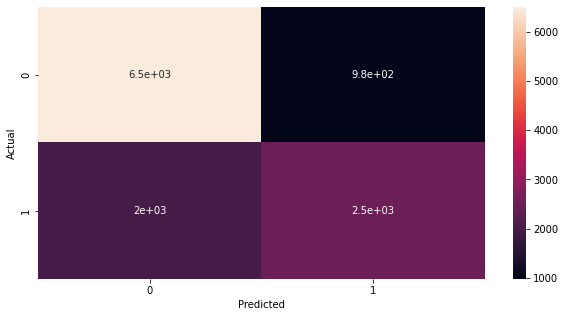

In [24]:
# randomeForesrtClasiifier

from sklearn.ensemble import RandomForestClassifier

#model creation
ML_Model=RandomForestClassifier()
print("Model created")

#model traning
ML_Model.fit(X_train,y_train)
print("Model trained")

#find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# Model Evaluation
model_Eval(y_test,y_pred)

mpdel created
model trained
find y_pred
accuracy for Decision Tree:-  69.43333333333334
Accuracy:-  0.6943333333333334
Error rate:-  0.30566666666666664
Precission :-  0.6882883076519442
Recall :- 0.6943333333333334
F1 score:-  0.6698000825869268
[[6628  858]
 [2810 1704]]


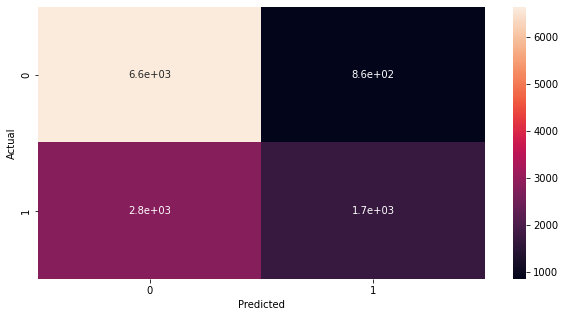

In [25]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# model creation
ML_Model=AdaBoostClassifier(n_estimators=100, random_state=0)
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

In [ ]:
#XGBoost
import xgboost as xgb

# model creation
ML_Model=xgb.XGBClassifier()
print("mpdel created")

# model train
ML_Model.fit(X_train,y_train)
print("model trained")

# find y_pred
y_pred=ML_Model.predict(X_test)
print("find y_pred")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("accuracy for Decision Tree:- ",acc*100)

# model evaluation
model_Eval(y_test,y_pred)

mpdel created
